In [2]:
!pip install camb
!pip install healpy

    100% |████████████████████████████████| 1.9MB 4.4MB/s 
  Running setup.py bdist_wheel for camb ... - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/45/c0/50/9626df787f93818dfce2ddac95ebd053ab9b34142458544d03
Successfully built camb
    100% |████████████████████████████████| 4.2MB 2.6MB/s 
    100% |████████████████████████████████| 8.3MB 891kB/s 
    100% |████████████████████████████████| 204kB 7.3MB/s 
    100% |████████████████████████████████| 92kB 18.9MB/s 
    100% |████████████████████████████████| 51kB 6.6MB/s 
  Running setup.py bdist_wheel for healpy ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ |

total
lens_potential
lensed_scalar
unlensed_scalar
unlensed_total
tensor
(2551, 4)


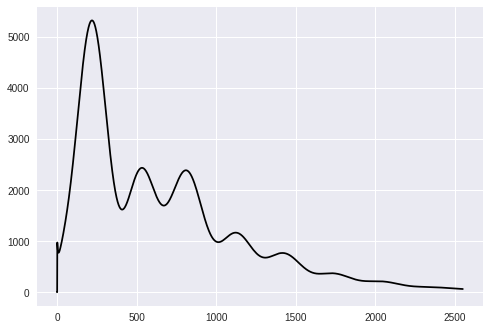

In [3]:
import camb
from camb import model, initialpower
import healpy as hp 
import numpy as np
from pylab import *
rcParams['image.cmap'] = 'jet'

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)


#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)

ls = np.arange(totCL.shape[0])
clf()
plot(ls,totCL[:,0], color='k')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/healpy/sphtfunc.py:390: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


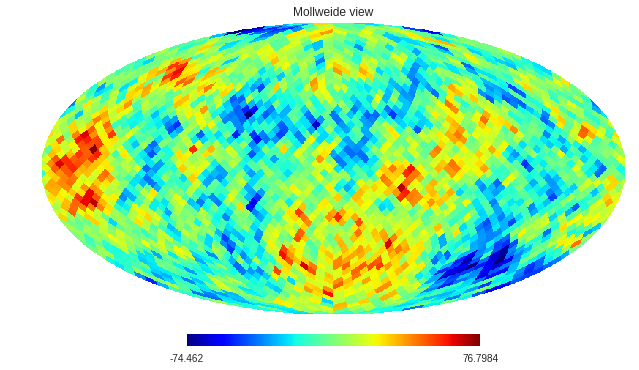

In [4]:
CL = totCL[:,0]/ls/(ls+1)
CL[0]=0

ns = 16
map =hp.synfast(CL[0:5*ns], ns, pixwin=False)
hp.mollview(map)

((32,), 32)
((528,), 528)
complex128
[ 3.45216223e-03+0.00000000e+00j -5.75695134e-03+0.00000000e+00j
 -6.99142099e+00+0.00000000e+00j  4.65725849e+00+0.00000000e+00j
  2.86433567e+00+0.00000000e+00j -6.98301365e+00+0.00000000e+00j
 -3.22660594e+00+0.00000000e+00j -4.19863179e+00+0.00000000e+00j
  4.27758997e-01+0.00000000e+00j  4.40649025e+00+0.00000000e+00j
 -1.78960044e+00+0.00000000e+00j  3.73797454e-01+0.00000000e+00j
 -2.38663226e+00+0.00000000e+00j -2.86604118e-01+0.00000000e+00j
  2.58810064e-01+0.00000000e+00j -2.84444761e-01+0.00000000e+00j
  2.84864239e-02+0.00000000e+00j -3.46385666e-01+0.00000000e+00j
 -7.17178251e-01+0.00000000e+00j  1.21810408e+00+0.00000000e+00j
 -1.60142798e-01+0.00000000e+00j  1.17145620e+00+0.00000000e+00j
 -6.25605091e-01+0.00000000e+00j  7.16078550e-01+0.00000000e+00j
  5.60721772e-01+0.00000000e+00j  3.39938067e+00+0.00000000e+00j
  9.99875781e-01+0.00000000e+00j  5.46037029e-01+0.00000000e+00j
  1.23718394e+00+0.00000000e+00j -1.64885555e+00+0.00

(0, 31)

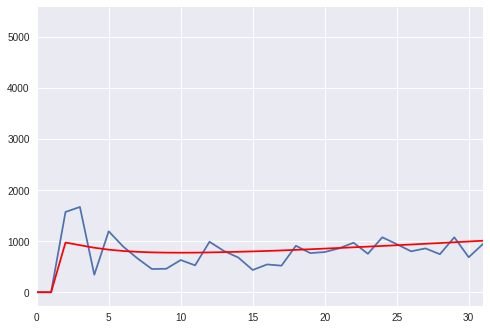

In [5]:
lmax = 2*ns-1
nl = 2*ns
nalm = (2*ns)*(2*ns+1)/2
outcl, outalm = hp.anafast(map,alm=True, lmax=lmax)
print(outcl.shape, nl)
print(outalm.shape, nalm)
print(outalm.dtype)
print(outalm[0:50])
ll = np.arange(outcl.shape[0])
clf()
plot(ll,ll*(ll+1)*outcl)
plot(ls, ls*(ls+1)*CL, 'r')
xlim(0,max(ll))

In [6]:
### Target power spectra
clt = CL[0:nl]
lt = ll[0:nl]

nbmodels = 100000
nnn = int(nbmodels/30)
npixok = 12*ns**2
limit_shape = 3*ns
okpix = np.arange(npixok)
mymaps = np.zeros((nbmodels, npixok))
myalms = np.zeros((nbmodels, nalm), dtype=complex128)
expcls = np.zeros((nbmodels, nl))
mycls = np.zeros((nbmodels, nl))
expcls = np.zeros((nbmodels, nl))
allshapes = np.zeros((nbmodels, len(ls)))
for i in xrange(nbmodels):
  ylo = np.random.rand()*2
  yhi = np.random.rand()*2
  if (i/nnn)*nnn == i: 
    print(i,ylo,yhi)
  theshape = ylo+(yhi-ylo)/(limit_shape)*ls
  theshape[theshape < 0] = 0
  theshape[limit_shape:] = 0
  allshapes[i,:] = theshape
  theCL = CL*theshape
  themap = hp.synfast(theCL, ns, pixwin=False, verbose=False)
  mymaps[i,:] = themap[okpix]
  expcls[i,:], myalms[i,:] = hp.anafast(themap, lmax=lmax, alm=True)
  mycls[i,:] = theCL[0:nl]


(0, 1.4299523947547015, 1.5975509112703294)
(3333, 1.0794649740832034, 1.0149527250923014)
(6666, 1.0690310465804718, 1.4224092332900329)
(9999, 0.8648774362755784, 1.7470219007668675)
(13332, 1.3588404073638694, 0.1234248431951761)
(16665, 1.2385759187201544, 0.5069571340153909)
(19998, 0.0462154560175112, 0.22678909834515837)
(23331, 1.8553224057066586, 1.8025575302085093)
(26664, 1.3557804276808454, 1.9774519217193873)
(29997, 0.9621989813734362, 1.6442078976137058)
(33330, 0.3201580556957784, 0.2629261384584276)
(36663, 1.0163332437262125, 0.2826971752442451)
(39996, 0.1922045216857855, 1.8798724576160062)
(43329, 1.0899345458603973, 0.6410197639498616)
(46662, 1.1161245109466071, 0.21479303282976114)
(49995, 1.7609101029609167, 1.326137995233921)
(53328, 1.4178349529040783, 0.7981455779326319)
(56661, 0.30251122795184227, 1.1613990854184209)
(59994, 1.7173694690262864, 0.4045620624154611)
(63327, 0.6975015565417131, 0.8619825358993543)
(66660, 0.4382552118079659, 1.643130307562776

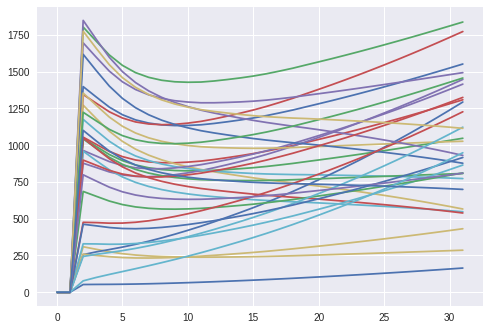

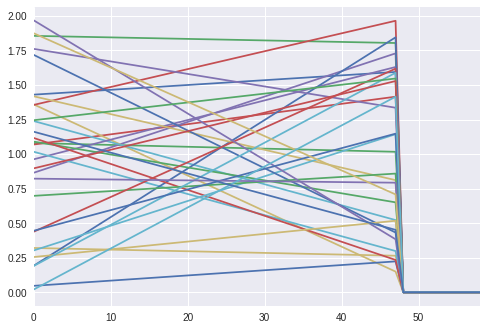

In [7]:
for i in xrange(nbmodels):
  if (i/nnn)*nnn == i:
    plot(lt, lt*(lt+1)*mycls[i,:])
    
figure()
xlim(0,3*ns+10)
for i in xrange(nbmodels):
  if (i/nnn)*nnn == i:
    plot(ls, allshapes[i,:])
    



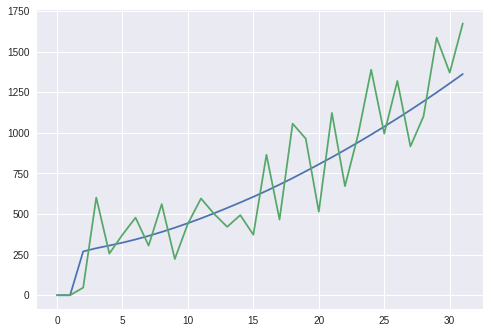

In [8]:
num = np.random.randint(0,nbmodels)
#figure()
#hp.mollview(mymaps[num,:])

figure()
plot(lt, lt*(lt+1)*mycls[num,:])
plot(lt, lt*(lt+1)*expcls[num,:])

In [9]:
### Deep Networks Configuration for the case of alm -> spectra
from tensorflow import keras
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense
model.add(Dense(units=nalm*6, activation='relu', input_dim=nalm, kernel_initializer='uniform'))
#model.add(Dense(units=nalm/2, activation='linear'))
model.add(Dense(units=nl, activation='linear'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Training
fraction = 0.8
ilim = int(nbmodels*fraction)
print(ilim)

mx = np.max(np.abs(myalms))
my = np.max(mycls)

from __future__ import print_function
class PrintNum(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 10 == 0: 
      print('')
      print(epoch, end='')
    sys.stdout.write('.')
    sys.stdout.flush()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


history=model.fit(myalms[0:ilim,:]/mx, mycls[0:ilim]/my, epochs=200, batch_size=1000, validation_split=0.1, verbose=0, callbacks=[early_stop, PrintNum()])

Using TensorFlow backend.


80000


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



0..........
10..........
20..........
30....

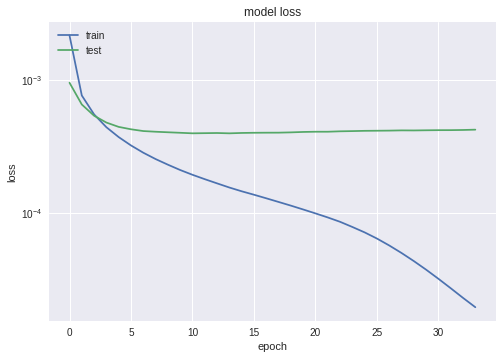

1.943949471044309e-05 0.000395543007471133 34


In [10]:
# summarize history for loss
plot(history.history['loss'])
plot(history.history['val_loss'])
title('model loss')
ylabel('loss')
xlabel('epoch')
legend(['train', 'test'], loc='upper left')
yscale('log')
show()
print(min(history.history['loss']), min(history.history['val_loss']), len(history.history['val_loss']))

In [0]:
myalms_test = myalms[ilim:,:]
mycls_test = mycls[ilim:,:]
expcls_test = expcls[ilim:,:]

result = my * model.predict(myalms_test / mx, batch_size=128)

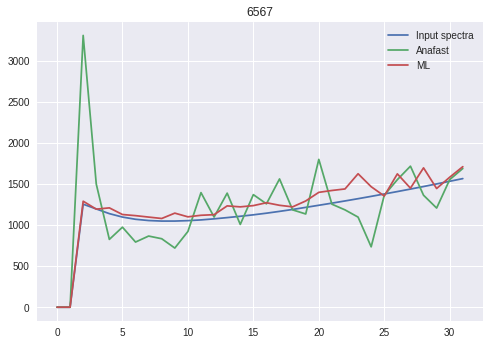

In [12]:
num=np.random.randint(result.shape[0])
plot(lt, lt*(lt+1)*mycls_test[num,:],label ='Input spectra')
plot(lt, lt*(lt+1)*expcls_test[num,:],label ='Anafast')
plot(lt, lt*(lt+1)*result[num,:],label ='ML')
title(num)
legend()

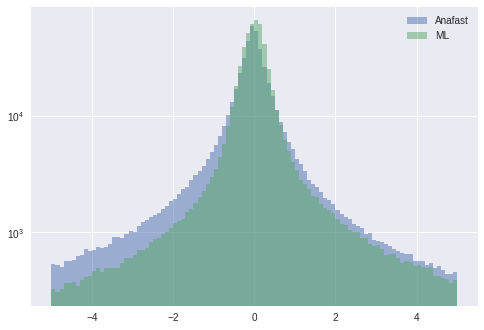

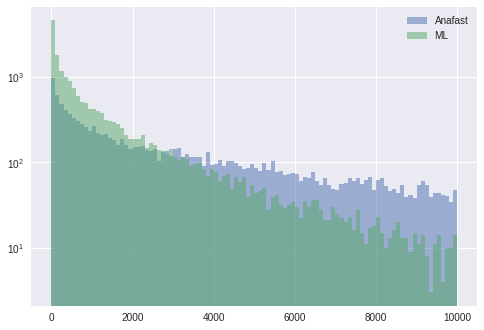

In [13]:
figure()
a=hist(np.ravel(expcls_test[:,2:]-mycls_test[:,2:]), bins=100, range=[-5,5], alpha=0.5, label='Anafast')
a=hist(np.ravel(result[:,2:]-mycls_test[:,2:]), bins=100, range=[-5,5], alpha=0.5, label = 'ML')
yscale('log')
legend()

ch2anafast = np.sum((expcls_test[:,2:]-mycls_test[:,2:])**2, axis=1)
ch2ML = np.sum((result[:,2:]-mycls_test[:,2:])**2, axis=1)

figure()
a=hist(ch2anafast, bins=100, range=[0,10000], alpha=0.5, label='Anafast')
a=hist(ch2ML, bins=100, range=[0,10000], alpha=0.5, label = 'ML')
yscale('log')
legend()

In [0]:
### Deep Networks Configuration for the case of T -> spectra
from tensorflow import keras
from keras.models import Sequential
model_T = Sequential()

from keras.layers import Dense
model_T.add(Dense(units=npixok*6, activation='relu', input_dim=npixok, kernel_initializer='uniform'))
model_T.add(Dense(units=nl, activation='linear'))

model_T.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Training
fraction = 0.8
ilim = int(nbmodels*fraction)
print(ilim)

mxT = np.max(np.abs(mymaps))
myT = np.max(mycls)

from __future__ import print_function
class PrintNum(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 10 == 0: 
      print('')
      print(epoch, end='')
    sys.stdout.write('.')
    sys.stdout.flush()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


historyT=model_T.fit(mymaps[0:ilim,:]/mxT, mycls[0:ilim]/myT, epochs=200, batch_size=1000, validation_split=0.1, verbose=0, callbacks=[early_stop, PrintNum()])

80000

0..........
10..........
20.

In [1]:
# summarize history for loss
plot(historyT.history['loss'])
plot(historyT.history['val_loss'])
title('model loss')
ylabel('loss')
xlabel('epoch')
legend(['train', 'test'], loc='upper left')
yscale('log')
show()
print(min(historyT.history['loss']), min(historyT.history['val_loss']), len(historyT.history['val_loss']))

NameError: ignored